<a href="https://colab.research.google.com/github/fabiohsst/air_passengers_forecast/blob/main/air_passenger_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Air passengers forecast using linear regression

That project aims predict the number of passengers in a flight based on previous 144 flights, from 1944 to 1960 in an anonymous flight company.
The main goal is test the numpy and sklearn libraries, applying linear regression, testing the functions to prepare, apply and test the predictions accuracy for just one variable.

The analyse process will be splited out in 3 phases:


*   Understanding the dataset
*   Preparing the dataset
*   Applying and testing the regression


                       

## Understanding the dataset

In [ ]:
import pandas as pd

In [ ]:
# loading dataset from github
passengers = pd.read_csv('https://raw.githubusercontent.com/fabiohsst/air_passengers_forecast/main/Passageiros.csv')
passengers.head()

,tempo,nPassageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [ ]:
# Changing columns name from Portuguese to English
passengers = passengers.rename(columns={'tempo': 'time', 'nPassageiros': 'nPassengers'})
passengers.head()

,time,nPassengers
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [ ]:
print("The dataset lenght is", len(passengers))
print("The earliest date is", passengers["time"].min())
print("The latest date is", passengers["time"].max())

The dataset lenght is 144
The earliest date is 1949.0
The latest date is 1960.91666666667


In [ ]:
#Importing libraries to visualize the data
import seaborn as sns
import matplotlib.pyplot as plt

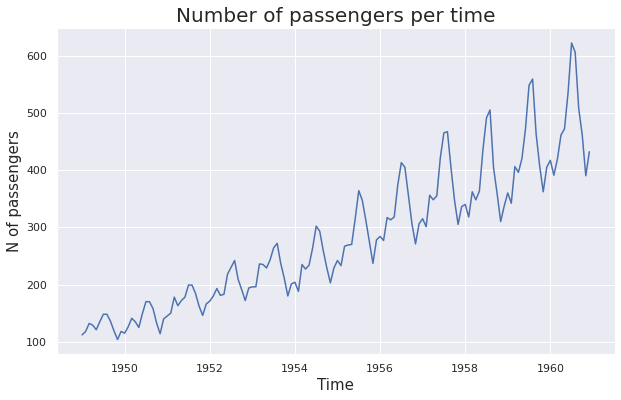

In [ ]:
# Plotting a lineplot graph
plt.figure(figsize = (10,6))
sns.set(font_scale=1)
ax = sns.lineplot(x="time", y="nPassengers", data=passengers)
ax.axes.set_title("Number of passengers per time",fontsize=20)
ax.set_xlabel("Time",fontsize=15)
ax.set_ylabel("N of passengers",fontsize=15)
plt.show()

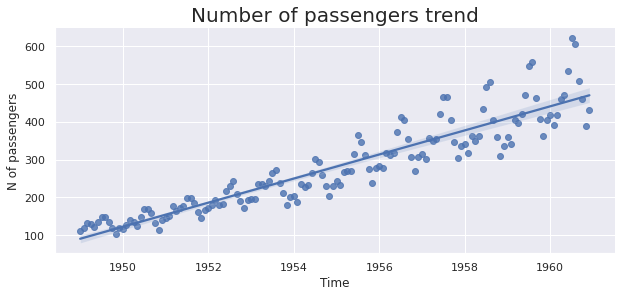

In [ ]:
# Visualizing the trend line
ax = sns.lmplot(x='time', y='nPassengers', data=passengers,height=4, aspect=2.2)
plt.title('Number of passengers trend', fontsize=20)
plt.xlabel('Time', fontsize=12)
plt.ylabel('N of passengers', fontsize=12)
plt.show()

From the above lines we can extract some informations:


*   The DataSet has 144 records of flights from early 1949 to late 1960 (we are not considering the decimals on the column time).
*   There seems to be a seasonality well defined. A further analyze would be necessary to evaluate the reasons behind that. As our goal is not to define it, I will skip that analyse by moment. 
*   There's a rising trend on number of passengers through the years.

## Preparing the DataSet

The next step is prepare our data to train our model.

That phase involve separete the dataset in two: *train* and *test*.

The *train* dataset will be used to our model learn the trend applying the linear regression - 70% of our dataset will be used to train the model -. While the test dataset will compare the model prediction with the reality - 30% of the Dataset wil be used to test. 

In [ ]:
from sklearn import preprocessing

In [ ]:
#Select all columns except the last
time = passengers.iloc[:,:-1].values

In [ ]:
npassengers = passengers.iloc[:,1].values

In [ ]:
#Podemos separar parte dos dados para treino e teste
from sklearn.model_selection import train_test_split

In [ ]:
time_train, time_test, npassengers_train, npassengers_test = train_test_split(time, npassengers, 
                                                                                      test_size = 0.3)

In [ ]:
from sklearn import linear_model

In [ ]:
regressor = linear_model.LinearRegression()

In [ ]:
#Fitting the line to training data
regressor.fit(time_train,npassengers_train)

LinearRegression()

In [ ]:
predicted_npassengers = regressor.predict(time_test)

## Applying and testing the regression

In [ ]:
import numpy as np

In [ ]:
#Inserting the data in a dataframe to them plot using seaborn
predicted_passengers = pd.DataFrame({'time': np.ndarray.flatten(time_test),
                                    'nPassengers': predicted_npassengers,})
passengers_test = pd.DataFrame({'time': np.ndarray.flatten(time_test),
                                    'nPassengers': npassengers_test,})


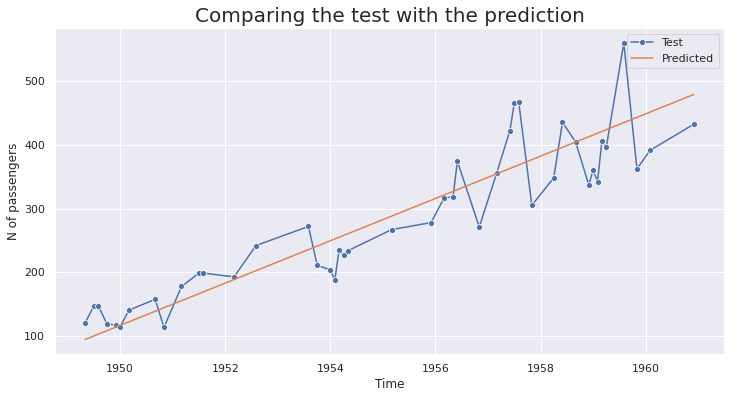

In [ ]:
plt.figure(figsize = (12,6))
sns.set(font_scale=1)
sns.lineplot(x="time", y="nPassengers", data = passengers_test,  marker='o', label = "Test")
sns.lineplot(x='time', y='nPassengers', data = predicted_passengers, label = "Predicted" )
plt.title('Comparing the test with the prediction', fontsize=20)
plt.xlabel('Time', fontsize=12)
plt.ylabel('N of passengers', fontsize=12)
plt.show()

It's possible to observe that the model predicted a trend line rising. That would be a start and definetely the trend make sense based on our previous data.

But as we can see on our data points and our previous lineplot visualization, there are a certain seasonality and our model must be able to predict it. 

### Measuring the regression quality

We are going to use the r2 score from scikit learn to evaluate our linear regression model.

In [ ]:
#Extracting angular coefficient from the fit line
regressor.coef_

array([33.09406629])

In [ ]:
#Extracting linear coefficient from fit line
regressor.intercept_

-64416.244170045116

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
# r2_score to the fit line 
r2_score(npassengers_test,predicted_npassengers)

0.8173027476065271

###SVR

Support Vector Regression is a supervised learning algorithm that is used to predict discrete values. Support Vector Regression uses the same principle as the SVMs. The basic idea behind SVR is to find the best fit line. In SVR, the best fit line is the hyperplane that has the maximum number of points.

Unlike other Regression models that try to minimize the error between the real and predicted value, the SVR tries to fit the best line within a threshold value. The threshold value is the distance between the hyperplane and boundary line. The fit time complexity of SVR is more than quadratic with the number of samples which makes it hard to scale to datasets with more than a couple of 10000 samples.

Font: [Ashwin Raj](https://towardsdatascience.com/unlocking-the-true-power-of-support-vector-regression-847fd123a4a0#:~:text=Support%20Vector%20Regression%20is%20a,the%20maximum%20number%20of%20points.)

In [ ]:
from sklearn.svm import SVR

In [ ]:
#Fit regression model with Support Vector Regression 
regressor_svr = SVR( C=1000000)
regressor_svr.fit(time_train,npassengers_train)

SVR(C=1000000)

In [ ]:
nPassengers_predicted_svr = regressor_svr.predict(time_test)

In [ ]:
passengers_predicted_svr = pd.DataFrame({'time': np.ndarray.flatten(time_test),
                                    'nPassengers': nPassengers_predicted_svr,
             })

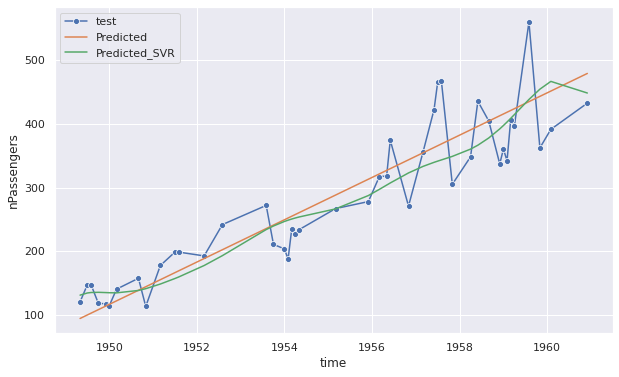

In [ ]:
plt.figure(figsize = (10,6))
sns.set(font_scale=1)
sns.lineplot(x="time", y="nPassengers", data = passengers_test,  marker='o', label = "test")
sns.lineplot(x='time', y='nPassengers', data = predicted_passengers, label = "Predicted" )
sns.lineplot(x='time', y='nPassengers', data = passengers_predicted_svr, label = "Predicted_SVR" )

In [ ]:
#r2_score to the fitted curve
r2_score(npassengers_test,nPassengers_predicted_svr)

0.8100960679147375

## Conclusion

At end of our model production we applied the Support Regression Model that basically help our model to find the best fit line within a threshold value.

The model is operating and can be used to predict the number of passengers in future just based on previous records. Although the model is functional, it's important to highlight that its using just one variable. When we work with predictions in market generally it's important to take in consideration many others variables that can affect directly or indirectly the final value (number of passengers in a flight). 

That model is usefull to illustrate how to apply Linear Regression and the use of Support Regression Model to an unique variable. 

In summary, for a prediction more accurate is necessary record and analyse more variables.